## Visualizing changes in Band Power for 5 Frequencies and 5 Positions
#### Pre and Post Kava Consumption

This notebook utilizes the [nilearn](https://nilearn.github.io/) and [mne](https://mne.tools/stable/index.html) python packages

#### Load Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import matplotlib.cm as cm
from matplotlib.patches import Wedge
import matplotlib.colors as mcolors
import mne

### Martin Data

In [48]:
martin_pre_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [3, 2.4, 3.8, 2, 5.4],
    'Alpha': [2.2, 1.6, 3.6, 2.4, 2.6],
    'Low_Beta': [1.6, 1.2, 1.4, 1.4, 1.4],
    'High_Beta': [1, 1, 0.8, 1, 1],
    'Gamma': [1.4, 1.4, 1.4, 1.8, 1.6]
})

martin_post_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [4.4, 3.2, 4.8, 2.6, 4.4],
    'Alpha': [4, 3, 4.6, 4.2, 4.2],
    'Low_Beta': [3.6, 2, 2.4, 2.2, 2.8],
    'High_Beta': [1.4, 0.8, 2, 1.2, 2.2],
    'Gamma': [1, 0.8, 1, 0.8, 1.2]
})

In [49]:
martin_pre_kava

,Region,Theta,Alpha,Low_Beta,High_Beta,Gamma
0,AF3,3.0,2.2,1.6,1.0,1.4
1,T7,2.4,1.6,1.2,1.0,1.4
2,Pz,3.8,3.6,1.4,0.8,1.4
3,T8,2.0,2.4,1.4,1.0,1.8
4,AF4,5.4,2.6,1.4,1.0,1.6


In [50]:
martin_post_kava

,Region,Theta,Alpha,Low_Beta,High_Beta,Gamma
0,AF3,4.4,4.0,3.6,1.4,1.0
1,T7,3.2,3.0,2.0,0.8,0.8
2,Pz,4.8,4.6,2.4,2.0,1.0
3,T8,2.6,4.2,2.2,1.2,0.8
4,AF4,4.4,4.2,2.8,2.2,1.2


### Apo Data

In [51]:
apo_pre_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [4.2, 2.4, 2.4, 3.8, 4.0],
    'Alpha': [2.0, 1.0, 3.0, 2.4, 2.4],
    'Low_Beta': [1.2, 1.0, 1.4, 1.6, 1.4],
    'High_Beta': [1.0, 0.6, 0.6, 0.8, 1.0],
    'Gamma': [0.4, 0.8, 0.6, 0.8, 0.8]
})

apo_post_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [2.0, 1.2, 1.8, 1.4, 3.0],
    'Alpha': [1.4, 1.0, 1.0, 1.2, 1.4],
    'Low_Beta': [1.2, 0.8, 1.0, 0.8, 1.2],
    'High_Beta': [1.0, 1.0, 1.0, 0.8, 1.0],
    'Gamma': [1.0, 0.8, 0.8, 1.0, 0.8]
})

In [52]:
apo_pre_kava

,Region,Theta,Alpha,Low_Beta,High_Beta,Gamma
0,AF3,4.2,2.0,1.2,1.0,0.4
1,T7,2.4,1.0,1.0,0.6,0.8
2,Pz,2.4,3.0,1.4,0.6,0.6
3,T8,3.8,2.4,1.6,0.8,0.8
4,AF4,4.0,2.4,1.4,1.0,0.8


In [53]:
apo_post_kava

,Region,Theta,Alpha,Low_Beta,High_Beta,Gamma
0,AF3,2.0,1.4,1.2,1.0,1.0
1,T7,1.2,1.0,0.8,1.0,0.8
2,Pz,1.8,1.0,1.0,1.0,0.8
3,T8,1.4,1.2,0.8,0.8,1.0
4,AF4,3.0,1.4,1.2,1.0,0.8


### Plotting split circles for visualization

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_61891/3176072555.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


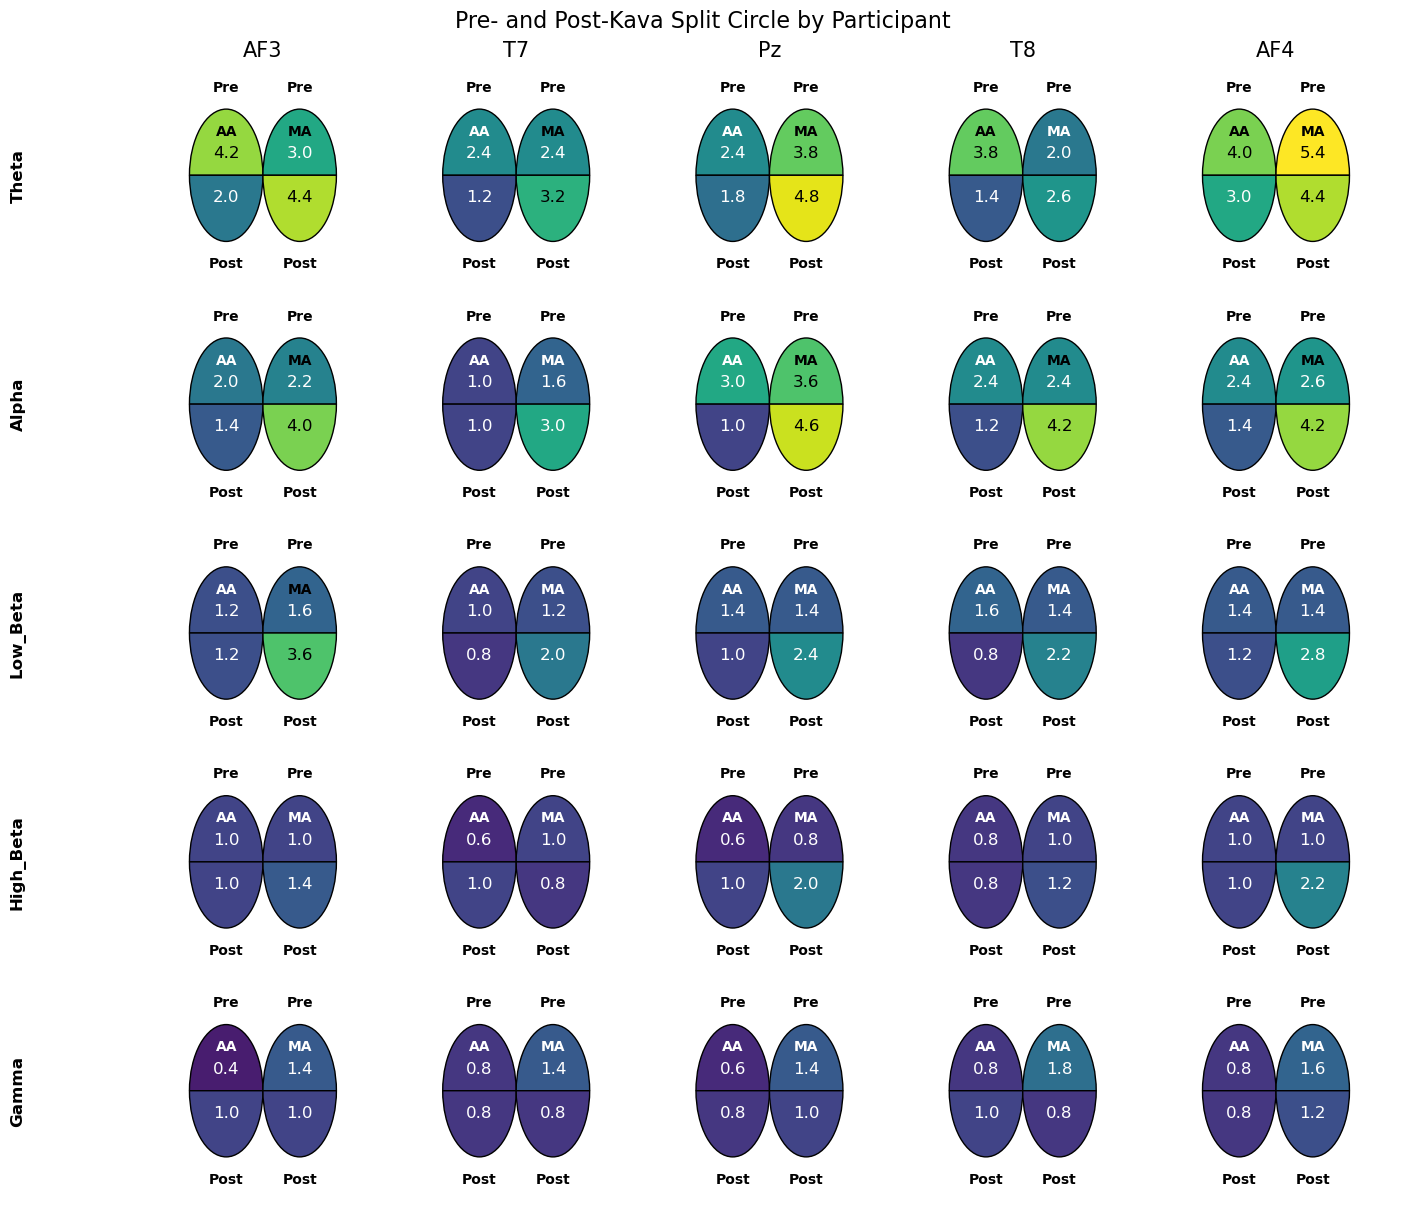

In [54]:
# Reshape function for merging pre and post data
def reshape_data(pre, post, participant):
    pre_long = pre.melt(id_vars='Region', var_name='Band', value_name='Pre')
    post_long = post.melt(id_vars='Region', var_name='Band', value_name='Post')
    data = pre_long.merge(post_long, on=['Region', 'Band'])
    data['Participant'] = participant
    return data

apo_data = reshape_data(apo_pre_kava, apo_post_kava, 'AA')
martin_data = reshape_data(martin_pre_kava, martin_post_kava, 'MA')
combined_data = pd.concat([apo_data, martin_data])

# Function to determine contrast color
def get_contrast_color(rgb):
    luminance = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return 'white' if luminance < 0.5 else 'black'

# Function to plot a split circle using Viridis color scale
def draw_split_circle(ax, x, y, pre, post, participant, cmap):
    color_pre = cmap(pre / 5.0)  # Normalize based on assumed max value of 5
    color_post = cmap(post / 5.0)
    
    # Draw top (Pre) and bottom (Post) wedges
    top_wedge = Wedge((x, y), 0.3, 0, 180, facecolor=color_pre, edgecolor='black')
    bottom_wedge = Wedge((x, y), 0.3, 180, 360, facecolor=color_post, edgecolor='black')
    
    ax.add_patch(top_wedge)
    ax.add_patch(bottom_wedge)
    
    # Add numeric labels for pre and post values
    pre_text_color = get_contrast_color(mcolors.to_rgb(color_pre))
    post_text_color = get_contrast_color(mcolors.to_rgb(color_post))
    
    ax.text(x, y + 0.1, f"{pre:.1f}", ha='center', va='center', fontsize=12, color=pre_text_color)
    ax.text(x, y - 0.1, f"{post:.1f}", ha='center', va='center', fontsize=12, color=post_text_color)
    
    # Add "Pre" and "Post" labels
    ax.text(x, y + 0.4, 'Pre', ha='center', va='center', fontsize=10, fontweight='bold')
    ax.text(x, y - 0.4, 'Post', ha='center', va='center', fontsize=10, fontweight='bold')

    # Label participant (dynamic color contrast)
    participant_color = get_contrast_color(mcolors.to_rgb(color_post if participant == 'MA' else color_pre))
    ax.text(x, 0.7, participant, ha='center', va='center', fontsize=10, fontweight='bold', color=participant_color)

# Plotting
fig, axes = plt.subplots(5, 5, figsize=(14, 12), constrained_layout=True)
regions = combined_data['Region'].unique()
bands = combined_data['Band'].unique()
viridis = cm.get_cmap('viridis')

for row, band in enumerate(bands):
    for col, region in enumerate(regions):
        ax = axes[row, col]
        subset = combined_data[(combined_data['Region'] == region) & (combined_data['Band'] == band)]
        
        # Create split circles
        for idx, row_data in subset.iterrows():
            x = 0.7 if row_data['Participant'] == 'AA' else 1.3
            draw_split_circle(ax, x, 0.5, row_data['Pre'], row_data['Post'], row_data['Participant'], viridis)
            
        ax.set_xlim(0, 2)
        ax.set_ylim(0, 1)
        ax.axis('off')
        
        if col == 0:
            ax.annotate(band, xy=(-0.5, 0.5), xycoords='axes fraction', 
                rotation=90, ha='center', va='center', fontsize=12, fontweight='bold')

        if row == 0:
            ax.set_title(region, fontsize=15)

# Add suptitle
plt.suptitle('Pre- and Post-Kava Split Circle by Participant', fontsize=16)
plt.show()

### Understandig EEG Coordinates

EEG signal acquisition is performed with the Emotiv insight device, a 5 channel wireless EEG headset.
The headset is primed and placed on the participants head. Each electrode is placed on the scalp
according to the international 10-10 system at positions. AF3, AF4, T7, T8 and Pz.


This [nature paper visualization](https://www.nature.com/articles/s41598-020-62525-7/figures/5) 

In [55]:
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
print(easycap_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 74 channels>


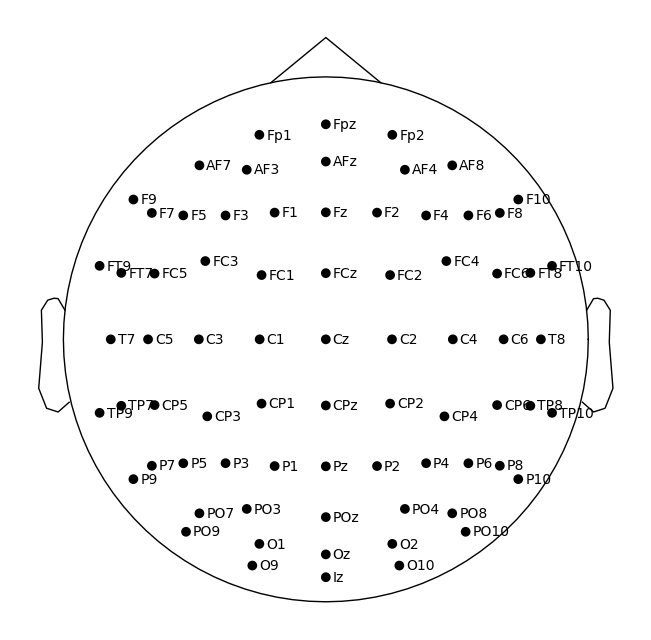

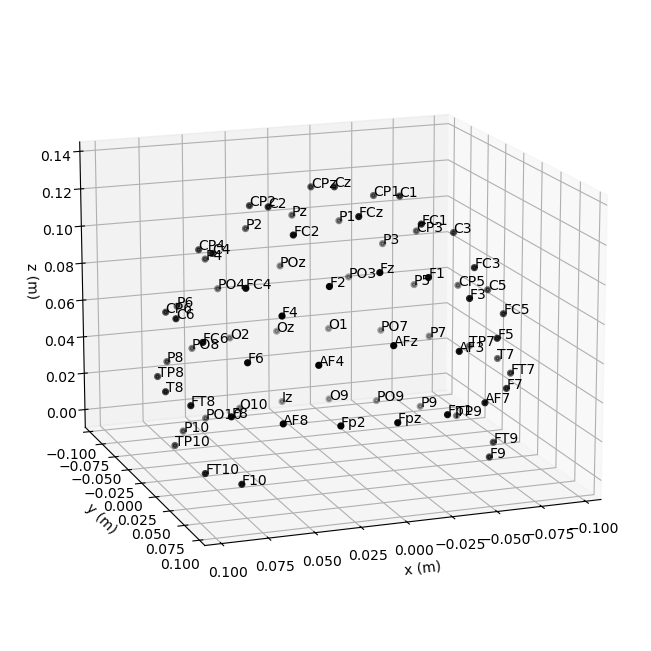

In [56]:
easycap_montage.plot()  # 2D
fig = easycap_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [61]:
import mne
montage = mne.channels.make_standard_montage('standard_1020')
coords = montage.get_positions()['ch_pos']
print(coords['AF3'])
print(coords['AF4'])
print(coords['T7'])
print(coords['T8'])
print(coords['Pz'])




[-0.0337007  0.0768371  0.021227 ]
[0.0357123 0.0777259 0.021956 ]
[-0.0841611 -0.0160187 -0.009346 ]
[ 0.0850799 -0.0150203 -0.00949  ]
[ 0.0003247 -0.081115   0.082615 ]


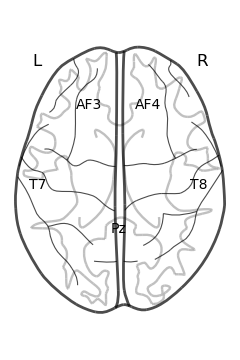

In [58]:
from nilearn.plotting import plot_glass_brain
import matplotlib.pyplot as plt
import numpy as np
# Define your EEG electrode coordinates and labels
coords = {
    'AF3': (-20, 35, 45),
    'AF4': (20, 35, 45),
    'T7': (-55, -20, 15),
    'T8': (55, -20, 15),
    'Pz': (0, -50, 30)  # Updated for posterior midline
}


coords_array = np.array(list(coords.values()))
labels = list(coords.keys())

# Plot the glass brain
display = plot_glass_brain(
    None,  # No statistical map
    display_mode='z'
)

# Add each marker and its corresponding label
for coord, label in zip(coords_array, labels):
    plt.annotate(
        label,
        (coord[0], coord[1]),  # Label placement
        color='black',
        fontsize=10,
        ha='center',
        va='center'
    )

# Show the plot
#plt.show()
plt.savefig("eeg_glass_brain_simple.png") 



### Made in Canva from two plots above

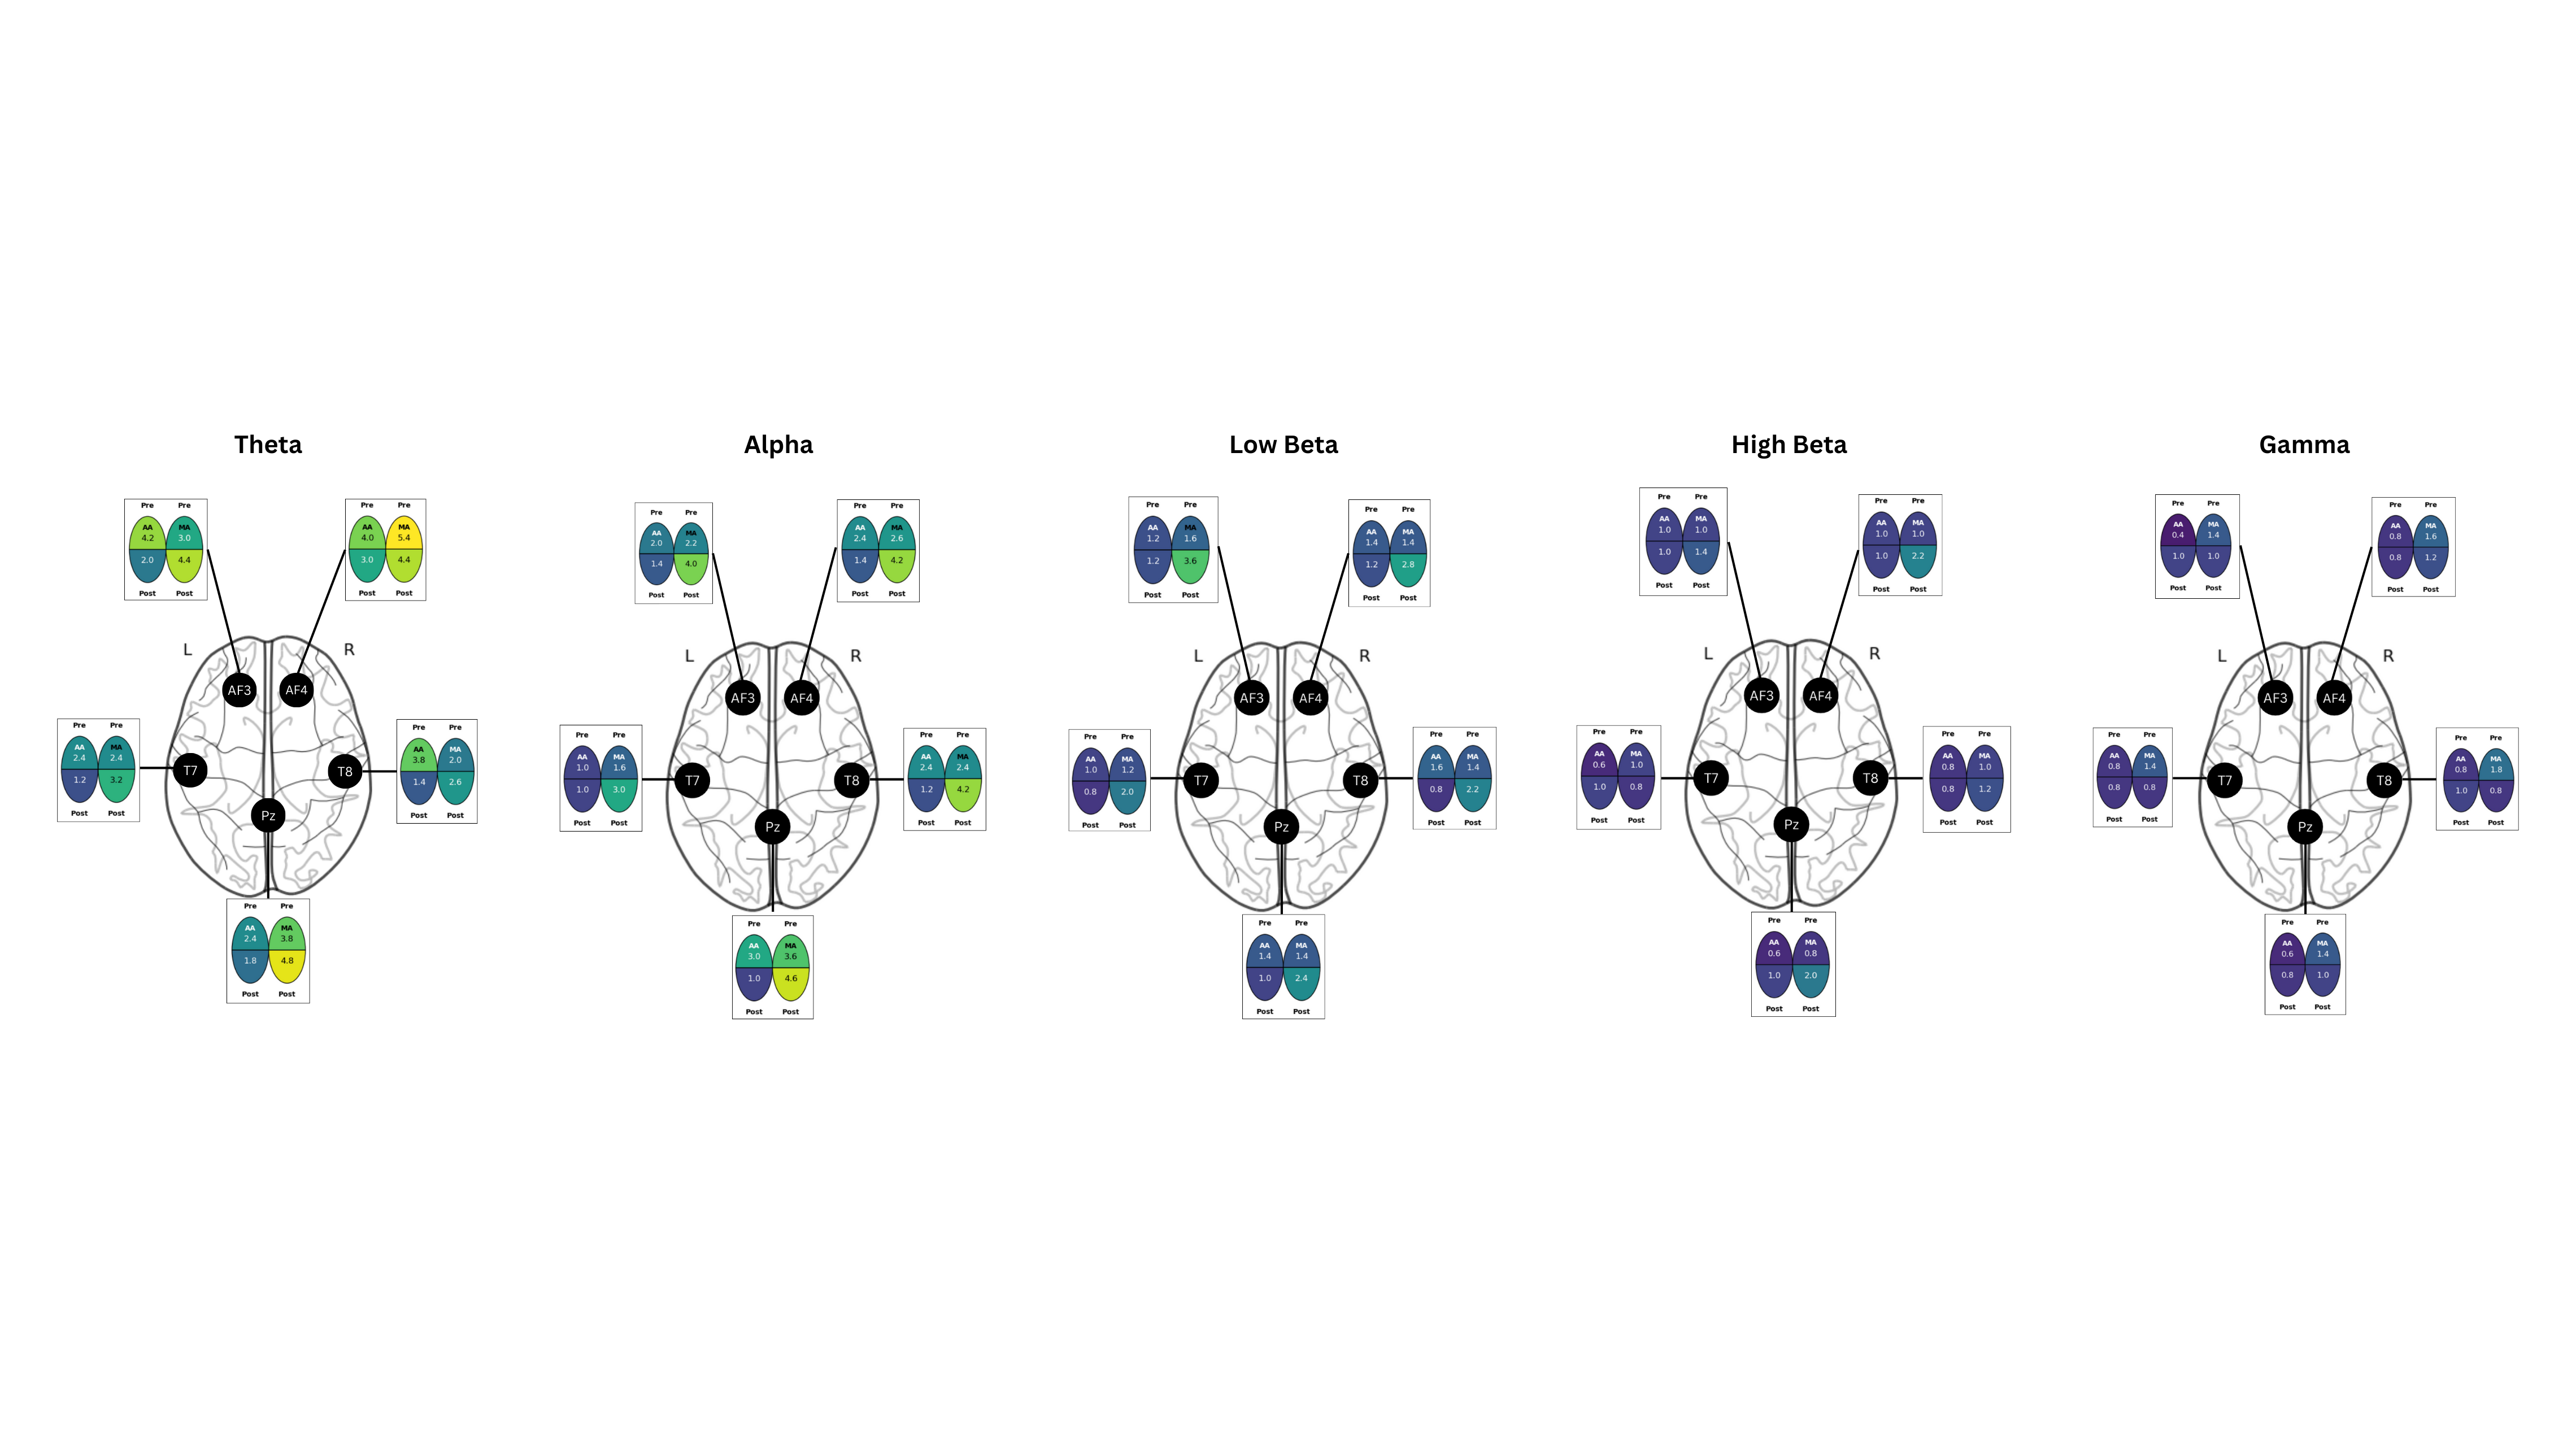

### Additional Plot

In [59]:
apo_difference_data = apo_post_kava.set_index('Region') - apo_pre_kava.set_index('Region')

martin_difference_data = martin_post_kava.set_index('Region') - martin_pre_kava.set_index('Region')



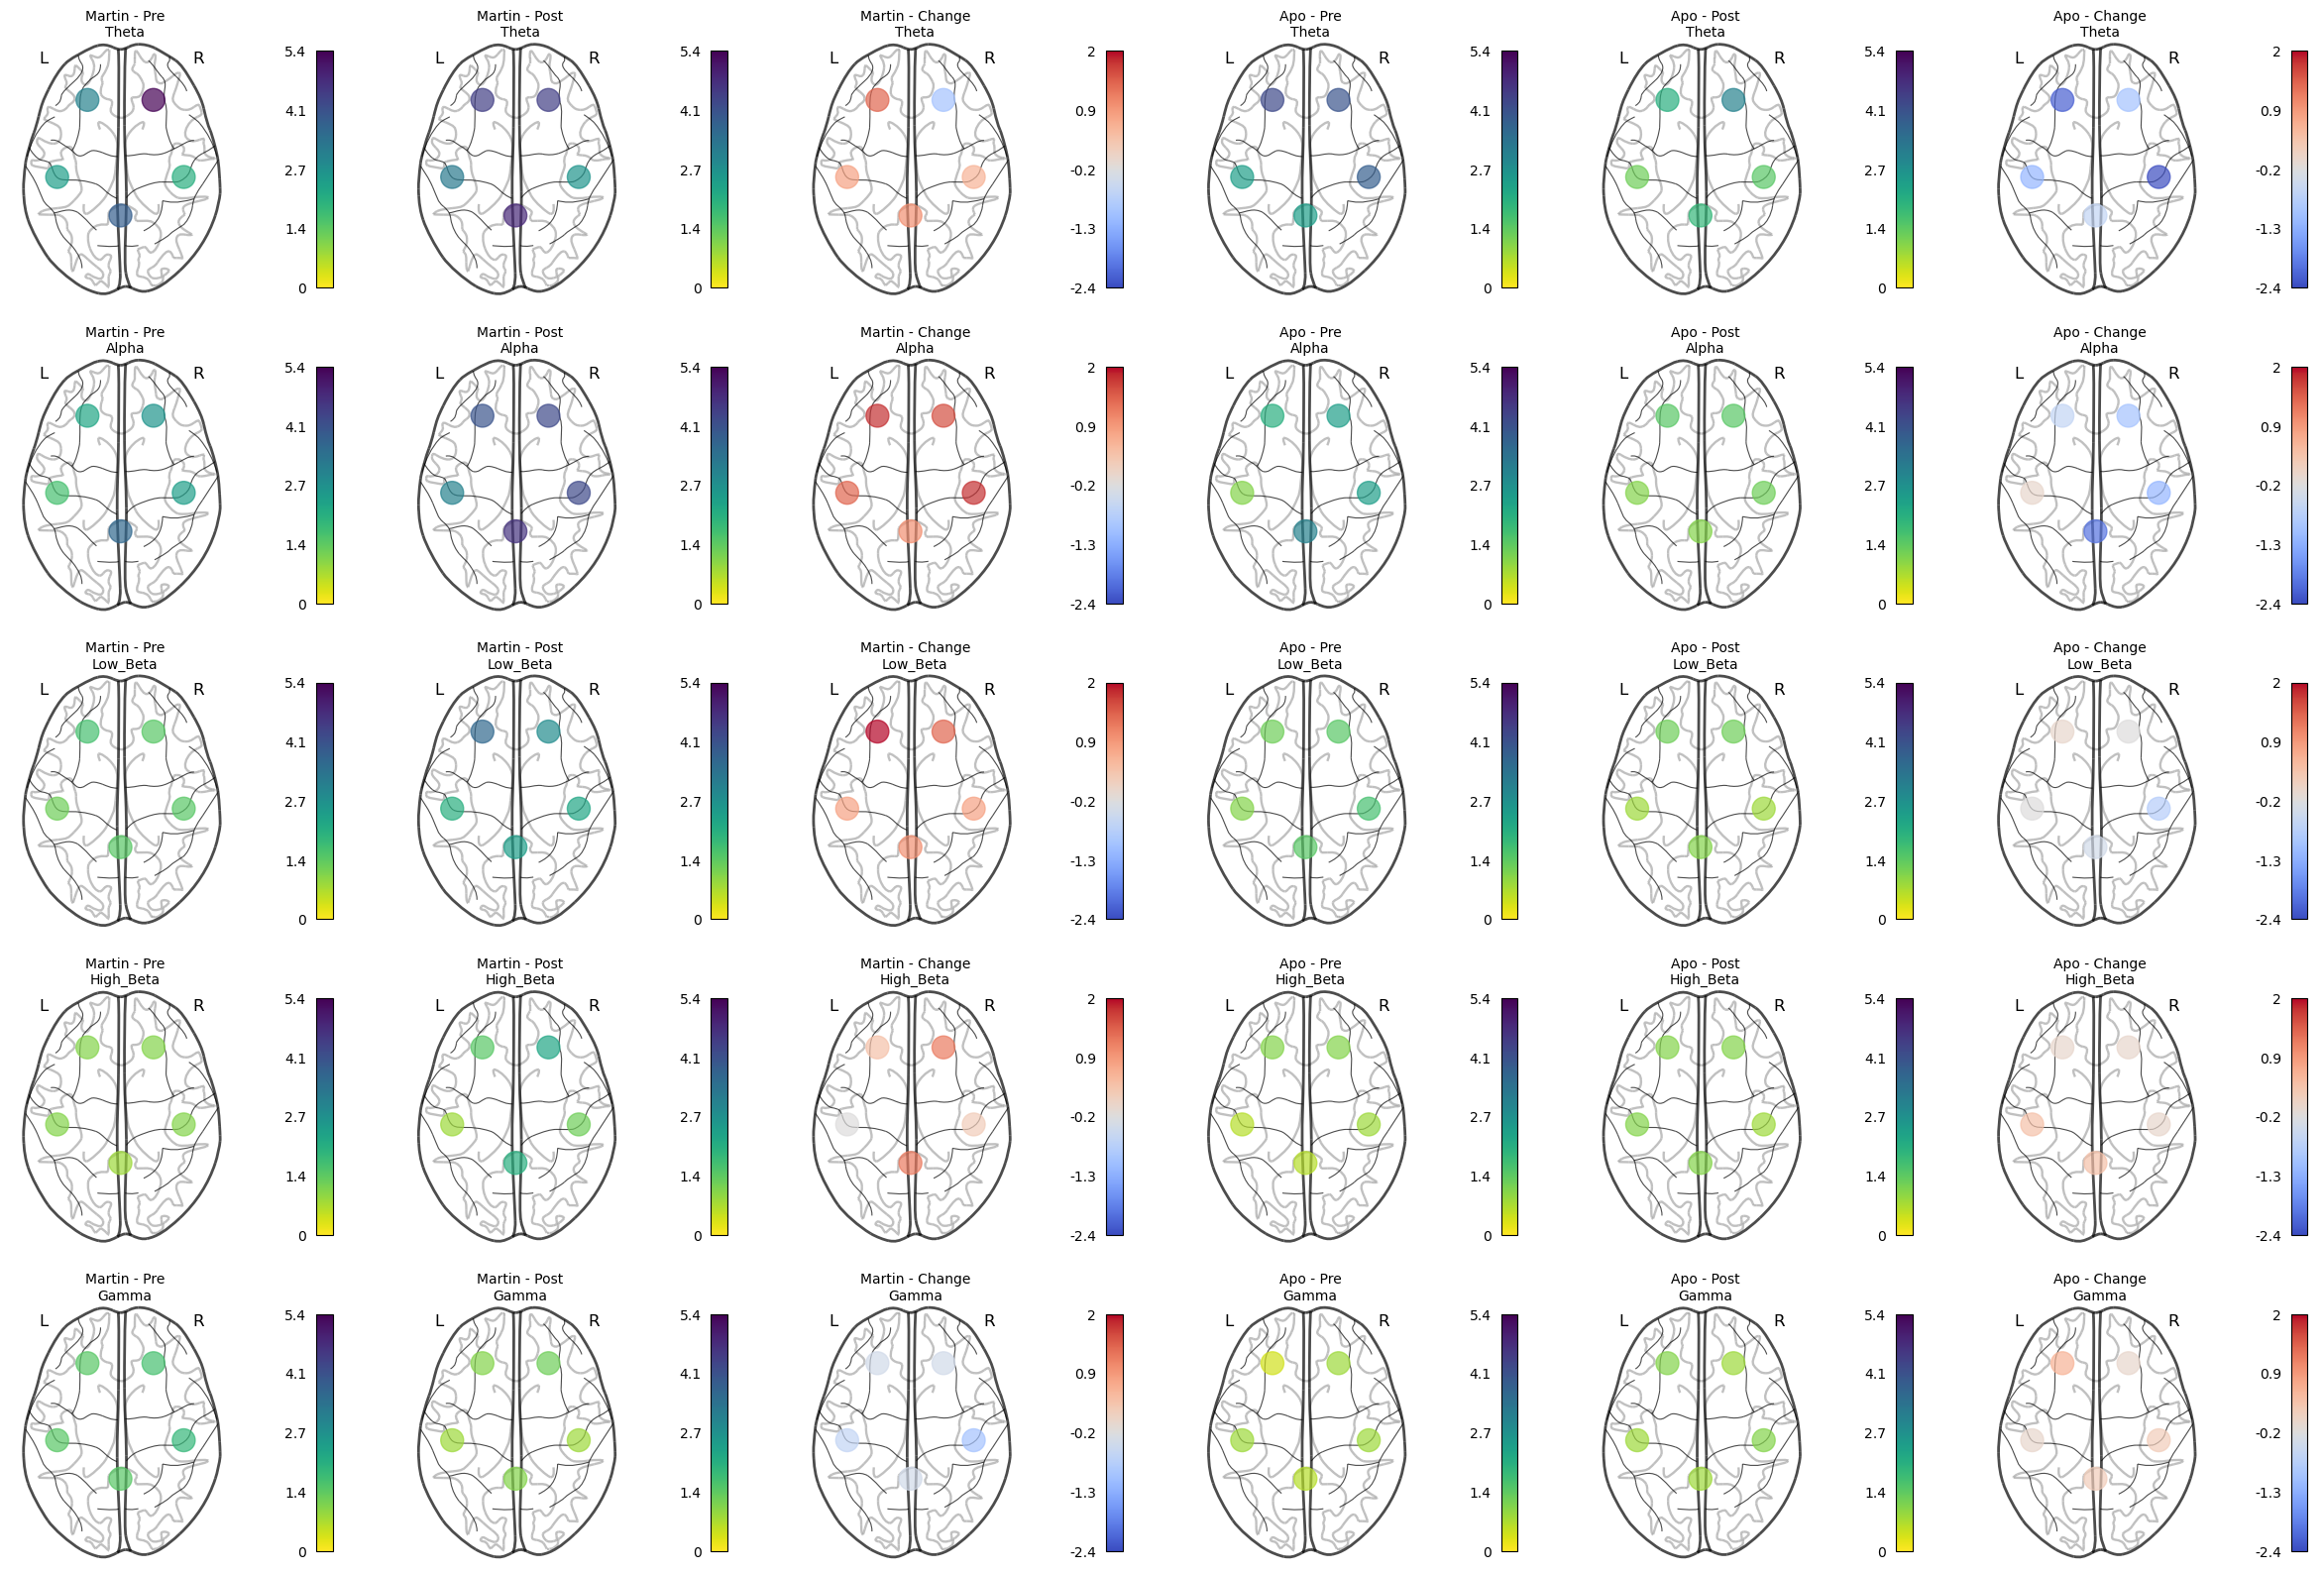

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

# Define electrode coordinates for AF3, T7, Pz, T8, AF4 (example)
coords = {
    'AF3': (-24, 34, 36),  # Frontal lobe
    'T7': (-46, -22, 10),   # Temporal lobe
    'Pz': (0, -50, 30),     # Parietal lobe
    'T8': (46, -22, 10),    # Temporal lobe
    'AF4': (24, 34, 36)     # Frontal lobe
}
coords_list = np.array(list(coords.values()))  # Convert to numpy array

# Define frequency bands, patients, and stages
frequencies = ['Theta', 'Alpha', 'Low_Beta', 'High_Beta', 'Gamma']
patients = ['Martin', 'Apo']
stages = ['Pre', 'Post', 'Change']

# Ensure data for pre, post, and change is correctly assigned
martin_data = {
    'Pre': martin_pre_kava.set_index('Region'),
    'Post': martin_post_kava.set_index('Region'),
    'Change': martin_difference_data
}

apo_data = {
    'Pre': apo_pre_kava.set_index('Region'),
    'Post': apo_post_kava.set_index('Region'),
    'Change': apo_difference_data
}

# Calculate global min and max for normalization
global_min = min(apo_difference_data.min().min(), martin_difference_data.min().min())
global_max = max(apo_difference_data.max().max(), martin_difference_data.max().max())

# Function to get the correct colormap and normalization for each stage
def get_colormap_and_norm(stage):
    if stage == 'Change':
        return 'coolwarm', global_min, global_max  # Diverging colormap centered at 0
    else:
        return 'viridis_r', 0, 5.4  # Adjusted range for Pre and Post

# Create the grid layout with matplotlib
fig, axes = plt.subplots(
    nrows=len(frequencies), ncols=len(patients) * len(stages), figsize=(30, 20)
)

# Iterate over frequencies (rows) and patient-stage combinations (columns)
# Iterate over frequencies (rows) and patient-stage combinations (columns)
for row_idx, freq in enumerate(frequencies):
    for col_idx, (patient, stage) in enumerate([(p, s) for p in patients for s in stages]):

        # Select the correct axis for this subplot
        ax = axes[row_idx, col_idx]

        # Fetch the correct data for the current patient and stage
        data = martin_data if patient == 'Martin' else apo_data
        node_values = data[stage][freq].values  # Extract the frequency values

        # Get the colormap and normalization for the current stage
        cmap, vmin, vmax = get_colormap_and_norm(stage)

        # Plot the glass brain markers on this axis (axial view only)
        plotting.plot_markers(
            node_values=node_values,
            node_coords=coords_list,
            node_size=275,  # Increase marker size for visibility
            node_cmap=cmap,  # Use the correct colormap
            node_vmin=vmin,  # Set global min for normalization
            node_vmax=vmax,  # Set global max for normalization
            alpha=0.7,  # Transparency
            black_bg=False,  # White background
            title=None,  # Disable titles in plot_markers
            display_mode="z",  # Axial view
            axes=ax  # Plot on the specific axis
        )

        # Manually add the title with precise positioning
        ax.text(
            0.35, 1.05,  # Horizontal (x) and vertical (y) position in axis coordinates
            f"{patient} - {stage}\n{freq}",  # Title text
            fontsize=10,  # Font size
            ha='center',  # Center alignment
            va='center',  # Vertical alignment
            transform=ax.transAxes  # Use axis coordinates for positioning
        )




# Show the complete grid of plots
plt.show()